In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

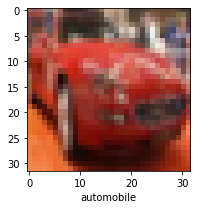

In [9]:
plot_sample(X_train, y_train, 5)

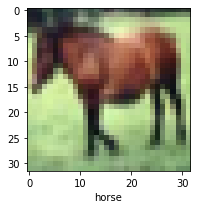

In [10]:
plot_sample(X_train, y_train, 7)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 123s 77ms/step - loss: 1.8107 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.6216 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.5392 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4794 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4299 - accuracy: 0.4962


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.69      0.56      1000
           1       0.74      0.43      0.54      1000
           2       0.38      0.29      0.33      1000
           3       0.37      0.27      0.31      1000
           4       0.32      0.55      0.41      1000
           5       0.44      0.31      0.36      1000
           6       0.43      0.68      0.53      1000
           7       0.57      0.45      0.50      1000
           8       0.68      0.51      0.59      1000
           9       0.59      0.53      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.4801 - accuracy: 0.4623
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1251 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9968 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9127 - accuracy: 0.6843
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8490 - accuracy: 0.7085
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7945 - accuracy: 0.7227
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7486 - accuracy: 0.7387
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7018 - accuracy: 0.7566
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6623 - accuracy: 0.7677
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 16ms/step - loss: 0.9346 - accuracy: 0.7034


[0.9346199035644531, 0.7034000158309937]

In [18]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(y_test, y_pred_classes_cnn))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.86      0.80      0.83      1000
           2       0.60      0.59      0.60      1000
           3       0.57      0.43      0.49      1000
           4       0.66      0.63      0.64      1000
           5       0.55      0.68      0.61      1000
           6       0.68      0.84      0.75      1000
           7       0.74      0.78      0.76      1000
           8       0.83      0.79      0.81      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[2.73984857e-03, 6.52844756e-05, 1.49872678e-03, 8.97399783e-01,
        1.81340321e-03, 4.56374362e-02, 3.72016840e-02, 7.94824664e-05,
        1.34714115e-02, 9.27852088e-05],
       [2.71059070e-02, 1.31841421e-01, 2.10197504e-05, 5.65850087e-06,
        5.80810111e-09, 3.06370467e-08, 6.01805041e-08, 1.27562728e-07,
        8.40685070e-01, 3.40614992e-04],
       [7.44692190e-03, 3.12389255e-01, 9.21173487e-04, 7.55330489e-04,
        9.41362960e-05, 1.65830919e-04, 3.95298630e-05, 6.31770061e-04,
        6.53987467e-01, 2.35686637e-02],
       [9.21279073e-01, 9.51582938e-03, 2.41894871e-02, 1.54051278e-03,
        5.59938094e-03, 1.06048574e-04, 1.77318871e-04, 1.13173883e-04,
        3.70593779e-02, 4.19855234e-04],
       [7.67605616e-06, 1.42128047e-05, 1.50638940e-02, 8.09470937e-02,
        3.62751752e-01, 9.72487498e-03, 5.30955255e-01, 3.80186830e-04,
        1.23552076e-04, 3.14261488e-05]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
print(y_test[:25])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5]


In [24]:
print(y_classes[:25])

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 6, 5, 7, 8, 6, 7, 2, 4, 9, 4]


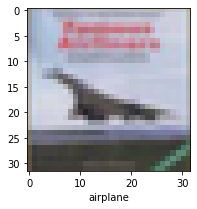

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'